In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit

import os
print(os.getcwd())

/home/IPT/IPT Lab Notebook/Kinetic_voltmeter/19-09-25/rebond mesure


           Time    ChanSum
0       0.00000  -0.007629
1       0.00001  -0.013079
2       0.00002  -0.010899
3       0.00003  -0.001090
4       0.00004  -0.008719
...         ...        ...
499995  4.99995  16.747612
499996  4.99996  16.756330
499997  4.99997  16.749792
499998  4.99998  16.744341
499999  4.99999  16.747612

[500000 rows x 2 columns]


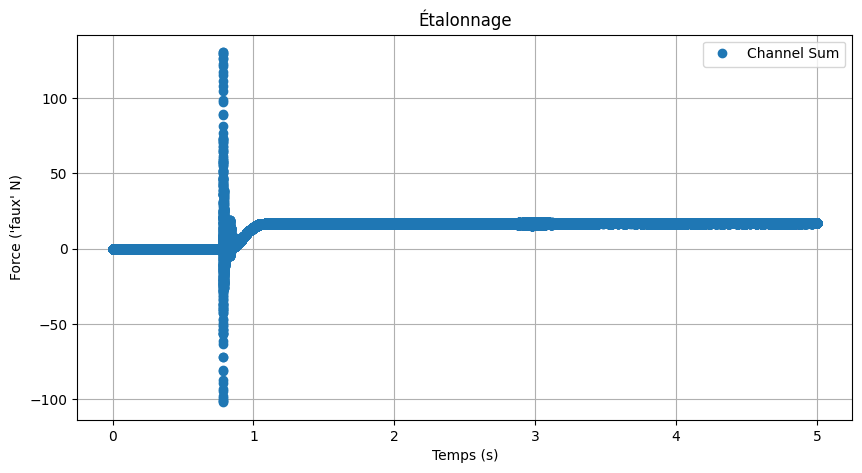

In [2]:
#poids 1
filename = "2100g.csv" #changer le nom du fichier si vous désirez
data = pd.read_csv(filename, names=["Time", "ChanSum"]) #lire le fichier et nommer les colonnes
print(data) #vérifier qu'on a bien lu quelque chose d'utile

plt.figure(figsize=(10,5)) #changer la taille de la figure, longeur, hauteur
# pour chaque colonne qu'on veut mettre sur un graph, utiliser: plt.plot(valeur_x, valeurs_y, format, legende, etc)

plt.plot( data["Time"], data["ChanSum"], 'o', label="Channel Sum") #'o' = grands points

plt.xlabel("Temps (s)")
plt.ylabel("Force ('faux' N)")
plt.title("Étalonnage")
plt.legend() #montrer une légende avec les différents "labels"
plt.grid() #montrer des quadrillages
plt.show()

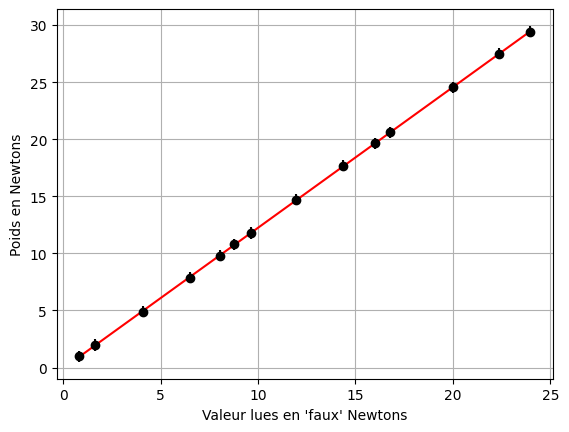

la pente est de 1.23+/0.02 et l'ordonnée à l'origine de -0.07+/-0.25


In [3]:
#Calibration :

filenames = ["100g.csv", "200g.csv", "500g.csv", "800g.csv","1000g.csv", "1100g.csv", "1200g.csv", "1500g.csv", "1800g.csv","2000g.csv", "2100g.csv", "2500g.csv","2800g.csv", "3000g.csv"]
means = []
eonmeans = []
for f in filenames:
    #On prend une "tranche" des données (attention, ceci prend le premier index et exclu le dernier), de l'index 80 à l'index 100 (20 échantillons):
    data = pd.read_csv(f, names=["Time", "ChanSum"])
    tranche = data["ChanSum"][300000:500000].values
    #On peut prendre leur moyenne:
    means.append(tranche.mean())
    #print("la moyenne des 20 derniers échantillons:", mean)

    #L'erreur sur leur moyenne (= deviation standard divisée par racine carée du nombre d'échantillons):
    eonmeans.append(tranche.std()/m.sqrt( len(tranche) ) )
    #print("Incertitude sur la moyenne de 20 derniers échantillons:", eonmean )

#On met les valeur des poids utilisés dans un vecteur numpy (que vous avez mesurés avec la balance de précision):
poids_kg = np.array([0.1004, 0.2010,0.5004, 0.8017,0.9998, 1.1003, 1.2009,1.5003,1.8017, 2.0008, 2.1011, 2.5011, 2.8025, 3.0007])# les poids en kg, utiliser les valeurs de la balance

#On leur donne tous la même incertitude, de la balance (hautement éxagérée ici!)
poids_kg_incert = 0.05 * np.ones(poids_kg.shape[0]) #on en fait un vecteur

#On multiplie les valeurs par g, pour avoir des Newtons
poids_N = 9.81 * poids_kg
poids_N_incert = 9.81 * poids_kg_incert

#On utilise ici les valeurs que vous avez déduites des mesures d'étalonnage
valeur_lues = np.array(means) # les moyennes, utiliser vos valeurs
valeur_lues_incert = np.array(eonmeans) # les incertitudes sur les moyennes

#On définit la fonction à utiliser pour le fit (une fonction linéaire)
def fit_fcn(x, a, b):
    return a*x + b

#Étant donné qu'on veut connaître les facteur pour convertir des valeur lues en "vrais" Newton,
#on va mettre les valeurs lues sur l'axe des X (même si ce sont des valeurs qu'on a mesurées, et
#que les poids correspondent plutôt à des valeurs qu'on a contrôlées)
#Attention, en faisant ceci on n'utilise en fait plus les incertitudes sur les valeur lues,
#qui ne sont pas prises en compte dans le fit (qui ne considére que les incertitudes en y)

#On fait le fit pour trouver la pente et l'intercept
fit_pars, fit_cov = curve_fit(fit_fcn, #la fonction
                       xdata = valeur_lues, #les valeurs x
                       ydata = poids_N, #les valeur y
                       sigma = poids_N_incert, #incertitudes en y 
                       absolute_sigma = True #nécessaire pour que les incertitudes soient prises en compte
                      )

#On extrait la pente et l'intercepte (ordonnée à l'origine) du fit
pente = fit_pars[0] #a est le premier paramètre de la fonction de fit
intercept = fit_pars[1] #b est le deuxième

#ainsi que leur incertitude (qui proviennent de la diagonale de la matrice de covariance du fit)
pente_incert = m.sqrt(fit_cov[0][0])
intercept_incert = m.sqrt(fit_cov[1][1])

#Et on finit avec un graph pour visualiser:

#la fonction de fit:
xfits = np.linspace(min(valeur_lues), max(valeur_lues), 100)
yfits = pente*xfits+intercept
plt.plot(xfits, yfits, '-', color='red')
#les données (points avec incertitudes, donc errorbar au lieu de plot)
plt.errorbar(x=valeur_lues, xerr=valeur_lues_incert, y=poids_N, yerr=poids_N_incert, fmt='o', color='black')
#les informations:
plt.xlabel("Valeur lues en 'faux' Newtons")
plt.ylabel("Poids en Newtons")
plt.grid()
plt.show()


print("la pente est de {:.2f}+/{:.2f} et l'ordonnée à l'origine de {:.2f}+/-{:.2f}".format(pente,pente_incert,intercept,intercept_incert))



In [4]:
def AppliquerEtalonnageLineaire(valeur_capteur):
    #vous pouvez, bien entendu, remplacer pente et intercept par des valeur numériques
    return pente*valeur_capteur + intercept

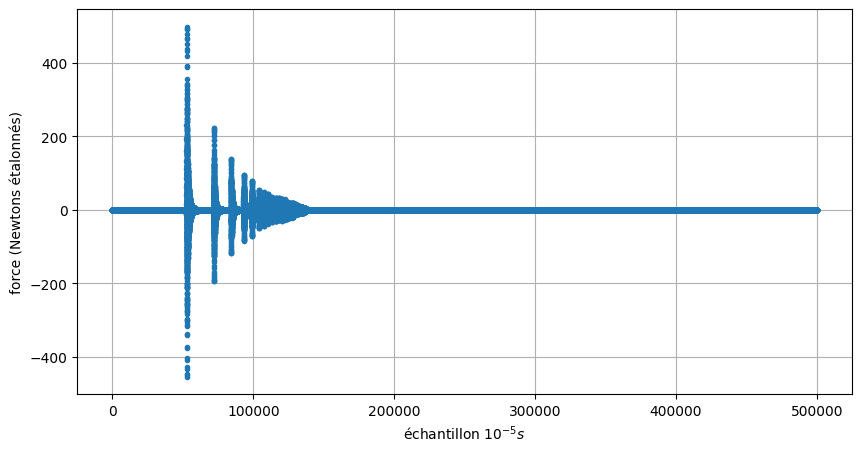

In [5]:
#pile AA

filename = "AA16(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.grid()
plt.show()

Pour chacune des piles, on peut établir un coeffcient de réstitution $e$ (mesure d'elasticité d'une collision) par la formule suivante :
$$
e = \frac{1}{N}\sum_{n = 1}^{N}\sqrt{\frac{h_{n+1}}{h_n}}
$$
, où $N$ est le nombre de rebonds et $h$ la hauteur du $n$-ième rebond. La hauteur peut être déterminée par la relation suivante :
$$
h_n = \frac{1}{2}g\Big(\frac{\Delta t_n}{2}\Big)^2
$$
avec $g = 9.81$ m/s$^2$ la constante gravitationnelle et $\Delta t_n$ la durée du $n$-ième rebond, mesurable grâce au set up d'expérience.

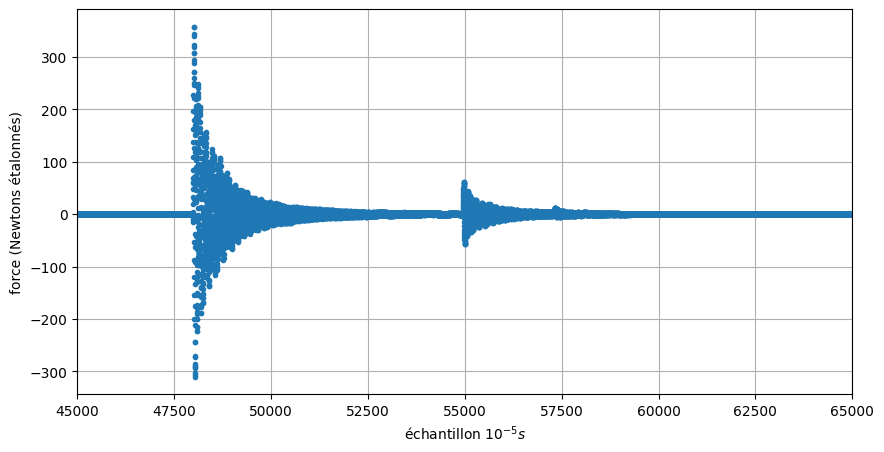

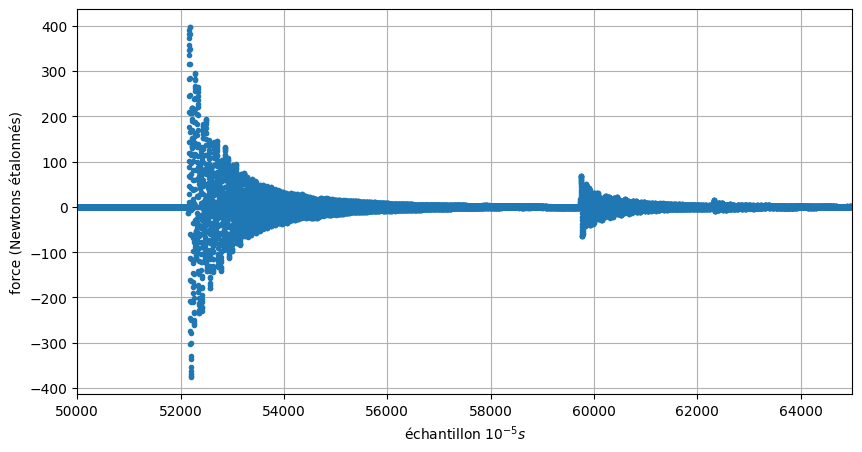

In [6]:
#Analyse de données pile AA2

filename = "AA2(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4.5*1e4, 6.5*1e4)
plt.grid()
plt.show()

filename = "AA2(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 6.5*1e4)
plt.grid()
plt.show()

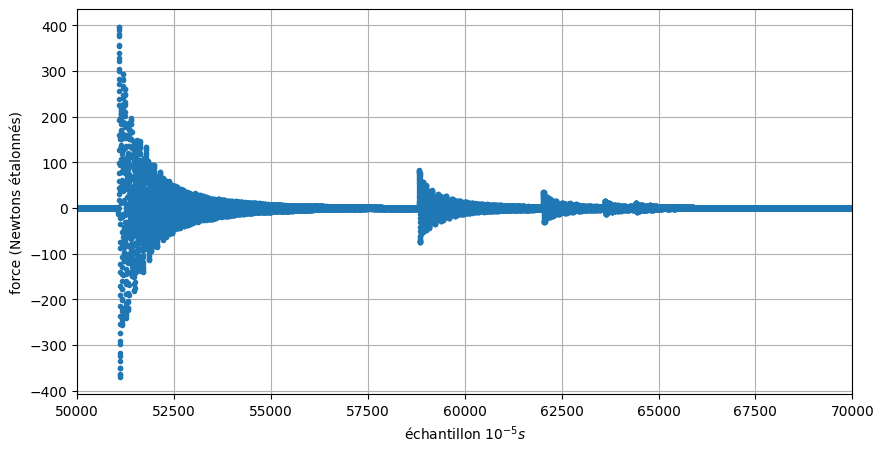

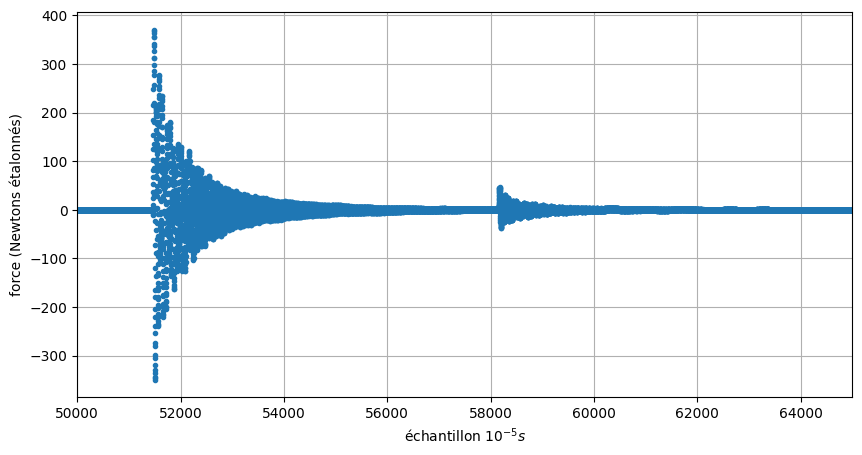

In [7]:
#Analyse de données pile AA3

filename = "AA3(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 7*1e4)
plt.grid()
plt.show()

filename = "AA3(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 6.5*1e4)
plt.grid()
plt.show()

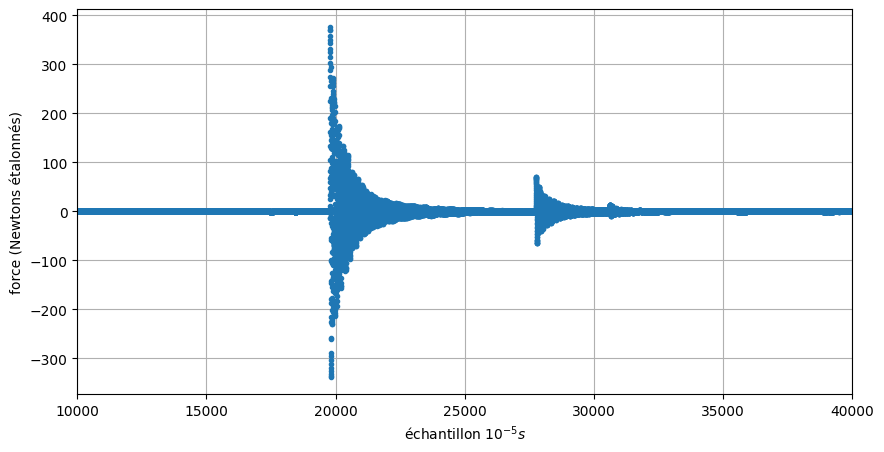

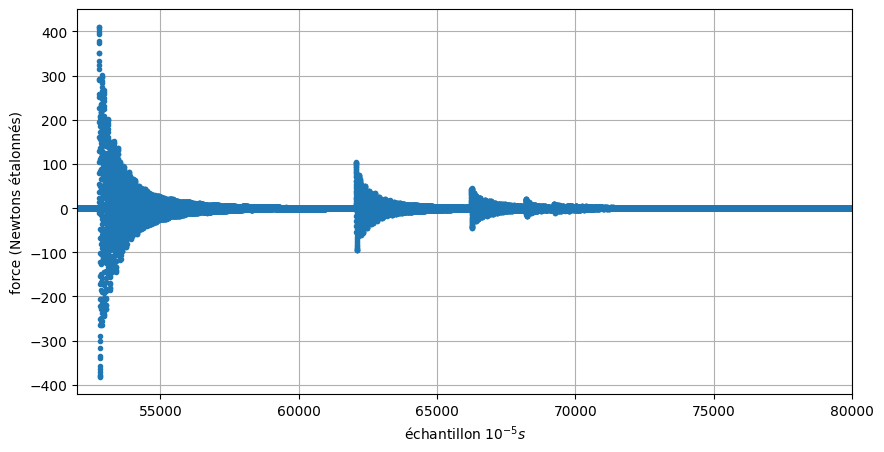

In [8]:
#Analyse de données pile AA4

filename = "AA4(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(1*1e4, 4*1e4)
plt.grid()
plt.show()

filename = "AA4(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5.2*1e4, 8*1e4)
plt.grid()
plt.show()

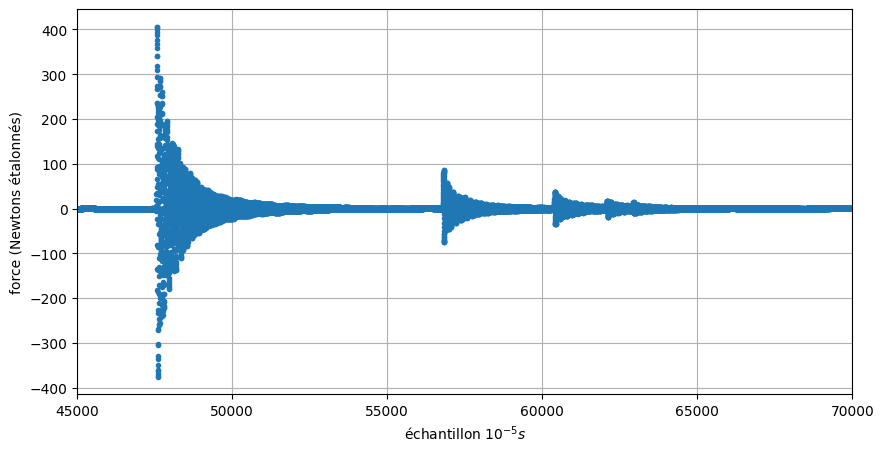

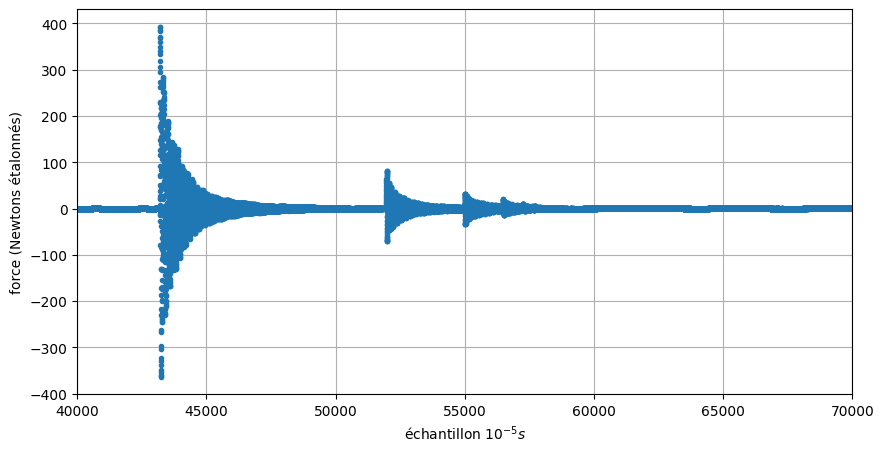

In [9]:
#Analyse de données pile AA5

filename = "AA5(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4.5*1e4, 7*1e4)
plt.grid()
plt.show()

filename = "AA5(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4*1e4, 7*1e4)
plt.grid()
plt.show()

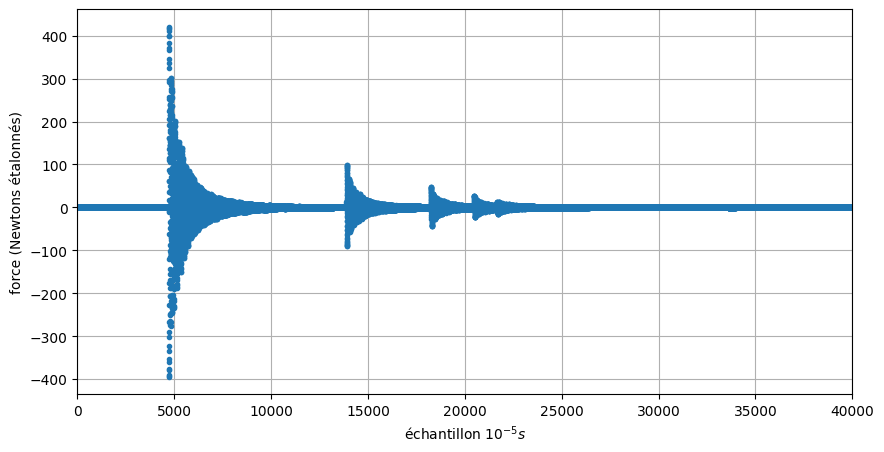

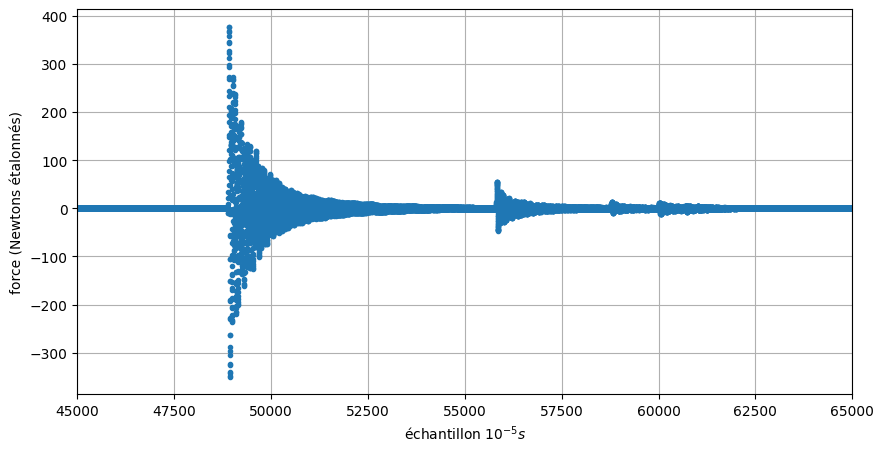

In [10]:
#Analyse de données pile AA6

filename = "AA6(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(0, 4*1e4)
plt.grid()
plt.show()

filename = "AA6(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4.5*1e4, 6.5*1e4)
plt.grid()
plt.show()

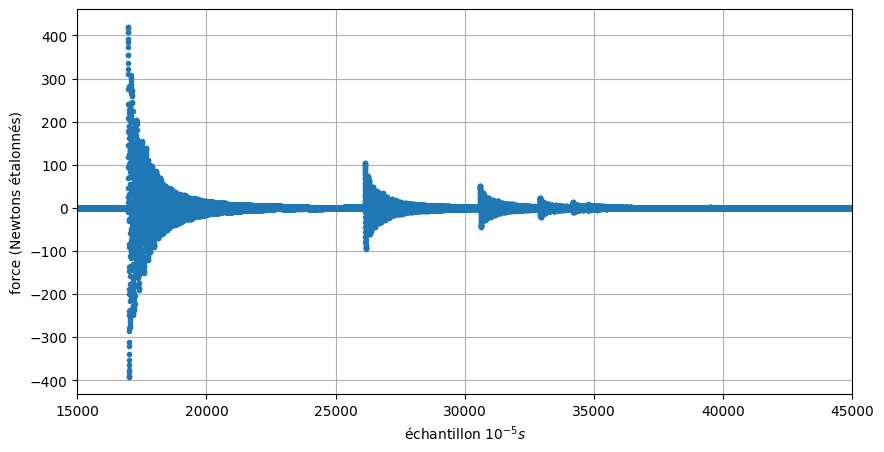

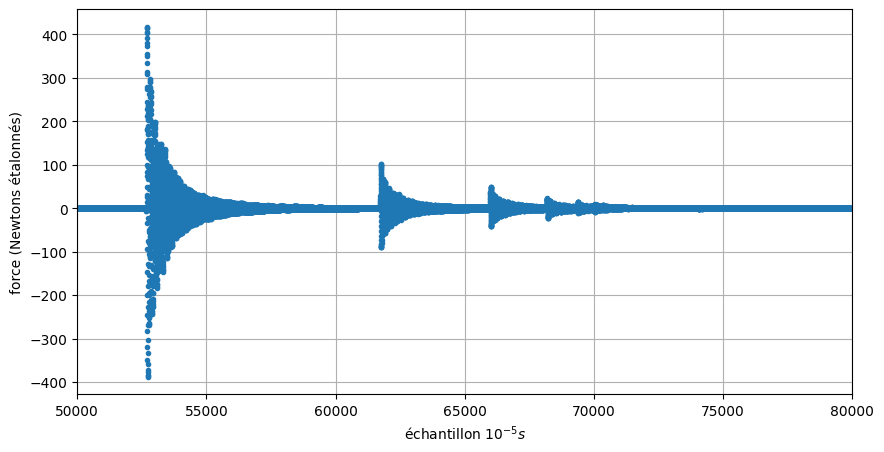

In [11]:
#Analyse de données pile AA7

filename = "AA7(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(1.5*1e4, 4.5*1e4)
plt.grid()
plt.show()

filename = "AA7(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 8*1e4)
plt.grid()
plt.show()

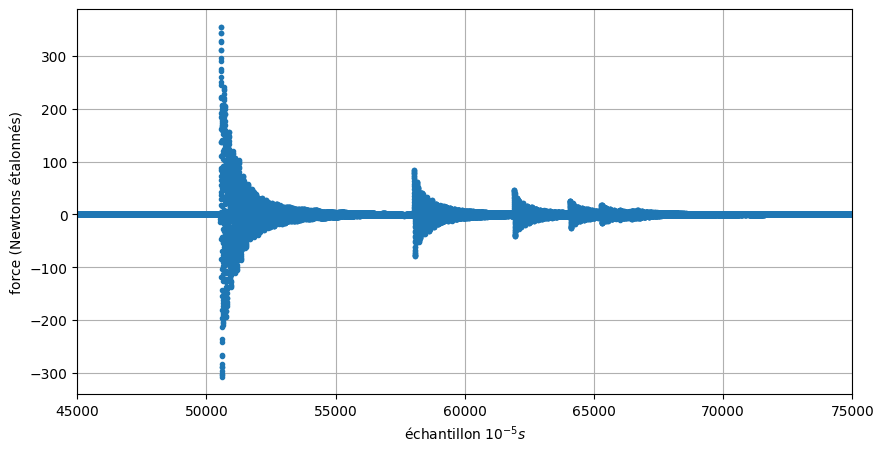

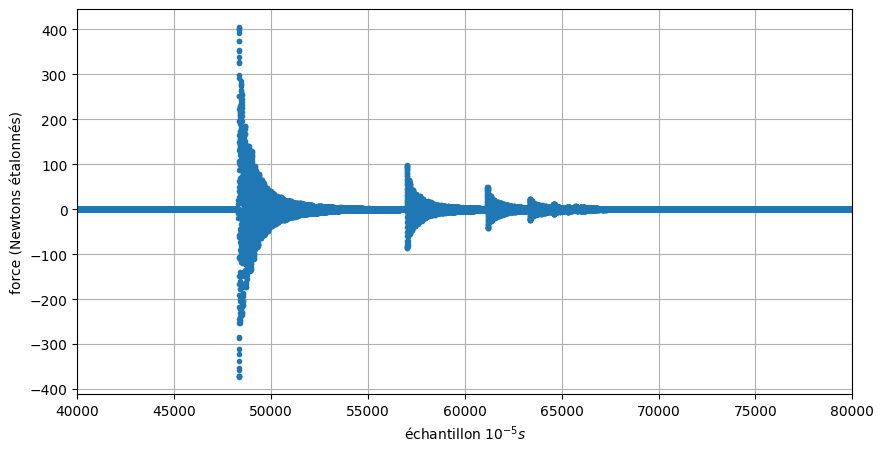

In [12]:
#Analyse de données pile AA8

filename = "AA8(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4.5*1e4, 7.5*1e4)
plt.grid()
plt.show()

filename = "AA8(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4*1e4, 8*1e4)
plt.grid()
plt.show()

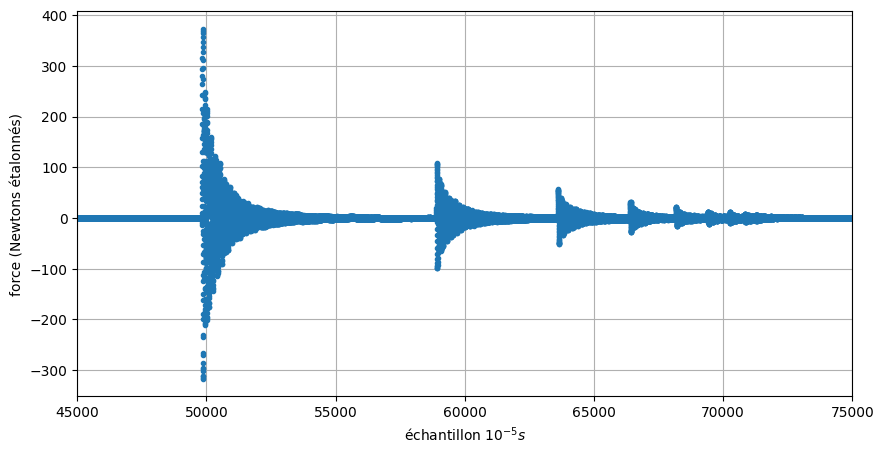

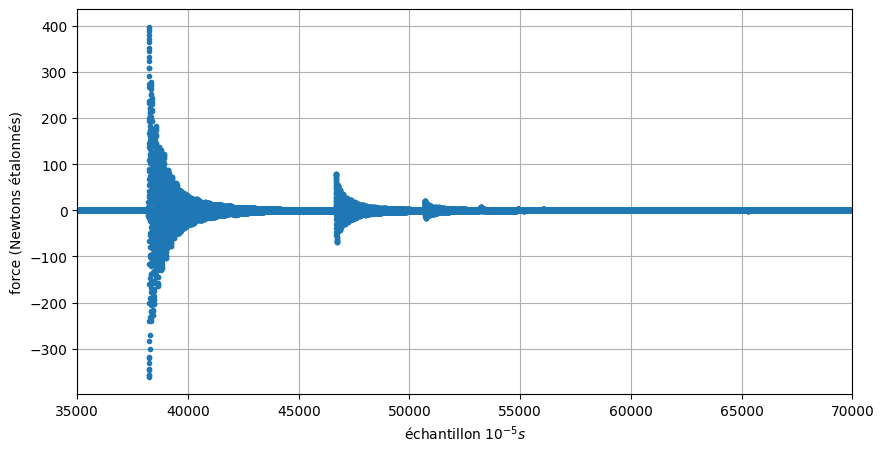

In [13]:
#Analyse de données pile AA9

filename = "AA9(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4.5*1e4, 7.5*1e4)
plt.grid()
plt.show()

filename = "AA9(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(3.5*1e4, 7*1e4)
plt.grid()
plt.show()

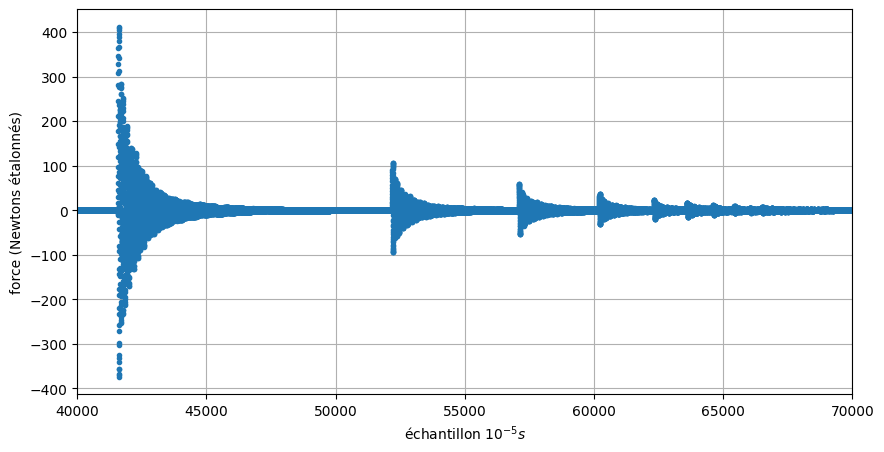

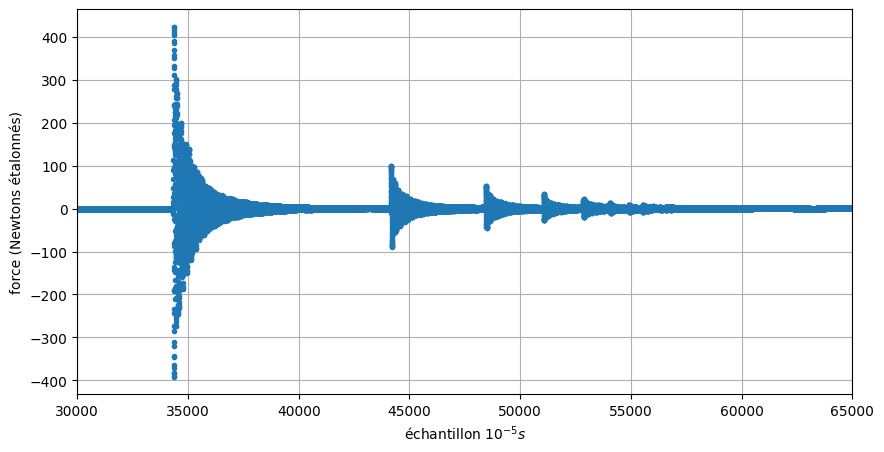

In [14]:
#Analyse de données pile AA10

filename = "AA10(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4*1e4, 7*1e4)
plt.grid()
plt.show()

filename = "AA10(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(3*1e4, 6.5*1e4)
plt.grid()
plt.show()

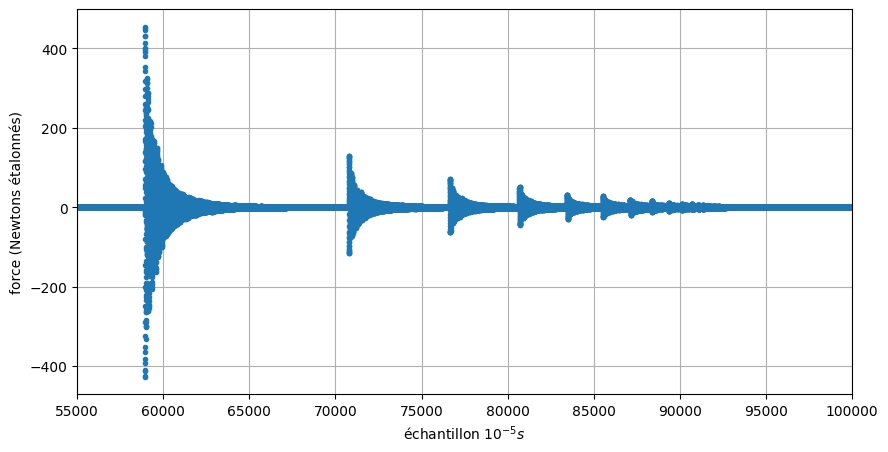

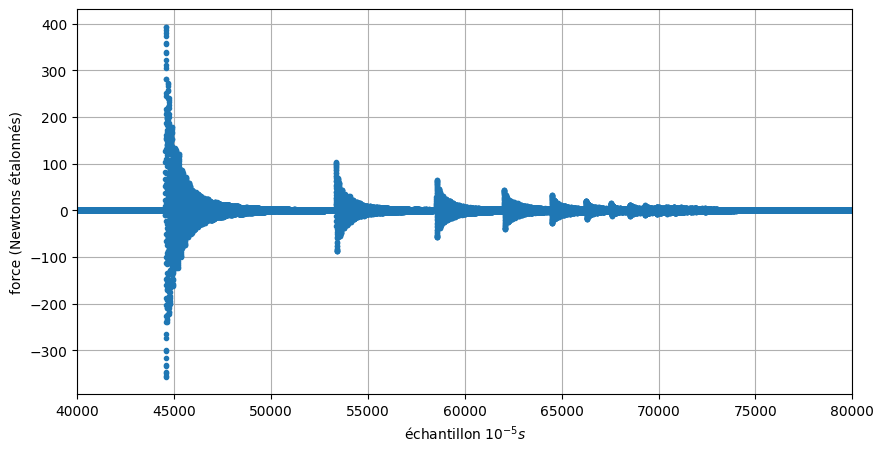

In [15]:
#Analyse de données pile AA11

filename = "AA11(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5.5*1e4, 10*1e4)
plt.grid()
plt.show()

filename = "AA11(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4*1e4, 8*1e4)
plt.grid()
plt.show()

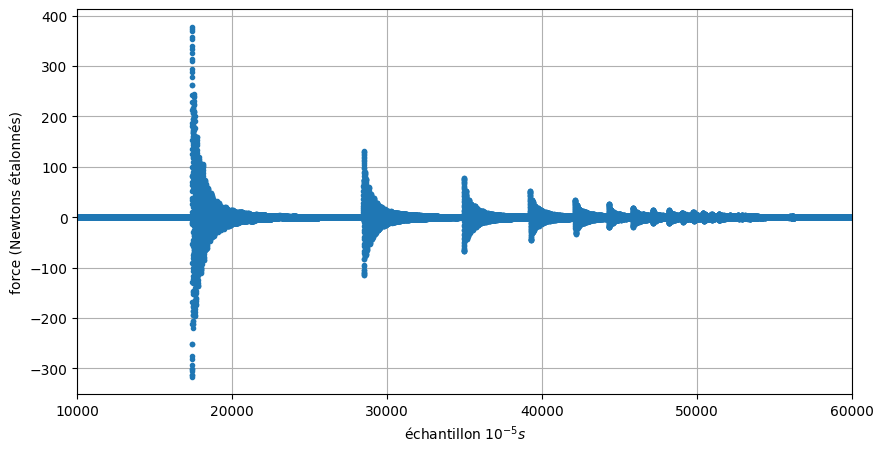

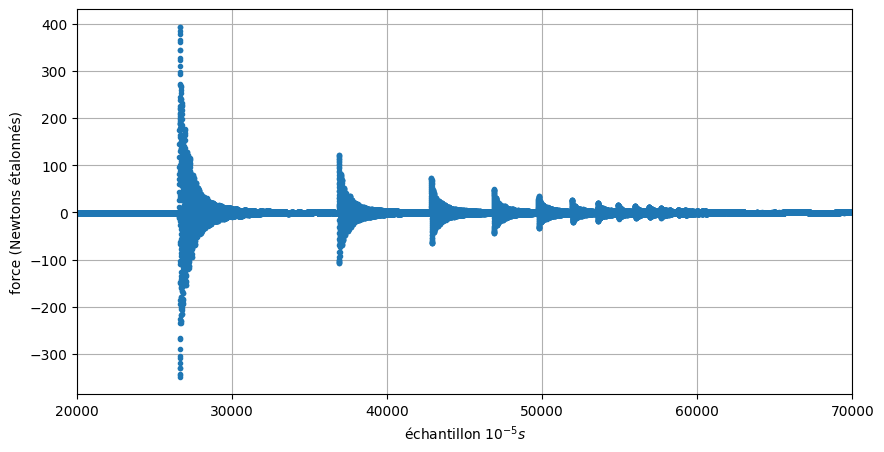

In [16]:
#Analyse de données pile AA12

filename = "AA12(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(1e4, 6*1e4)
plt.grid()
plt.show()

filename = "AA12(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(2*1e4, 7*1e4)
plt.grid()
plt.show()

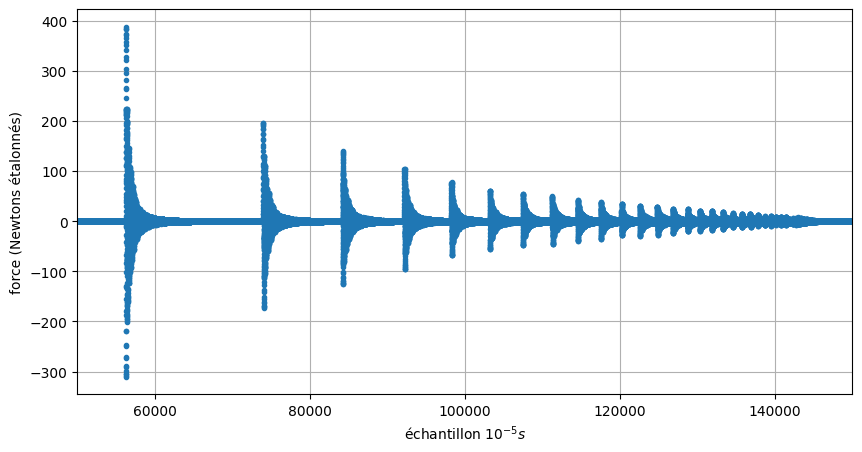

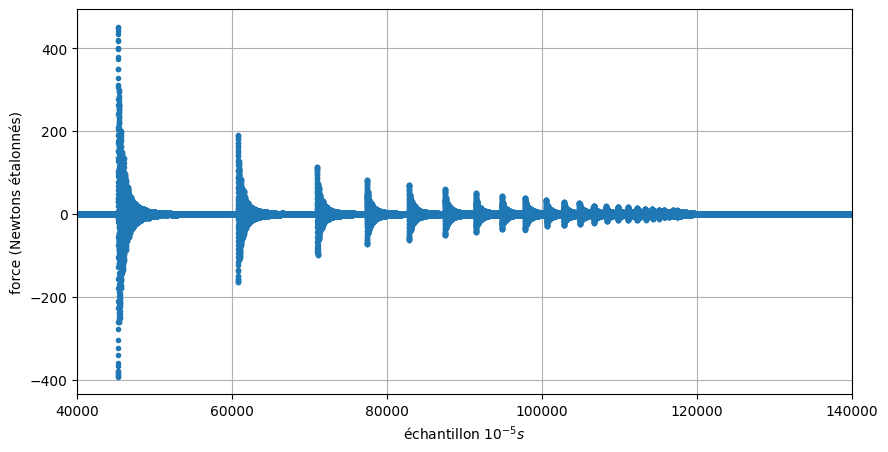

In [17]:
#Analyse de données pile AA13

filename = "AA13(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 15*1e4)
plt.grid()
plt.show()

filename = "AA13(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(4*1e4, 14*1e4)
plt.grid()
plt.show()

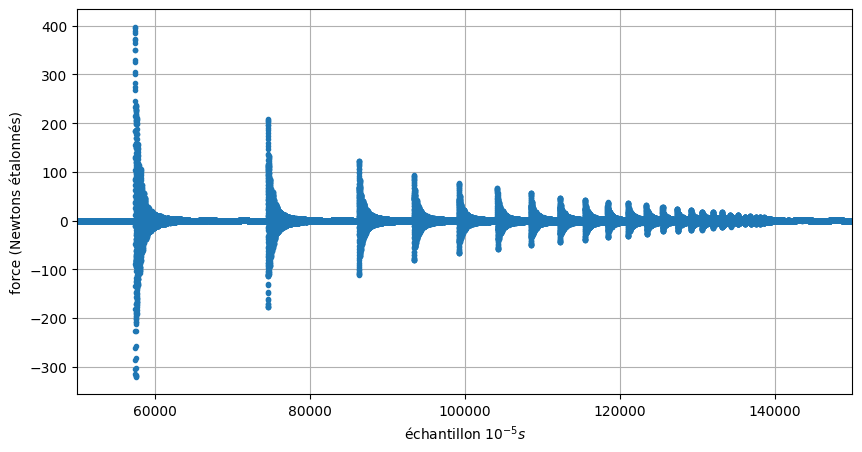

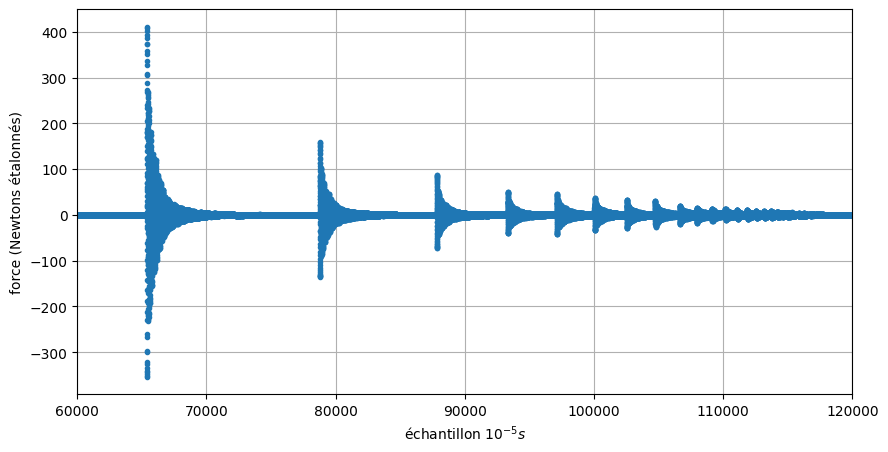

In [18]:
#Analyse de données pile AA14

filename = "AA14(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 15*1e4)
plt.grid()
plt.show()

filename = "AA14(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(6*1e4, 12*1e4)
plt.grid()
plt.show()

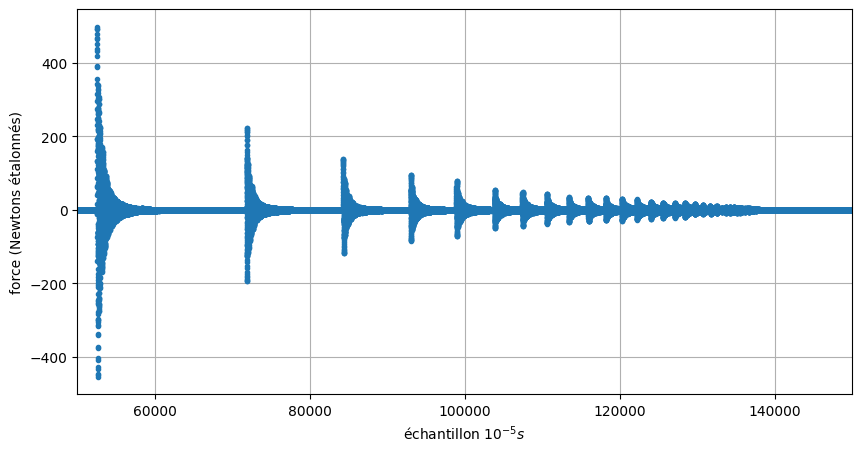

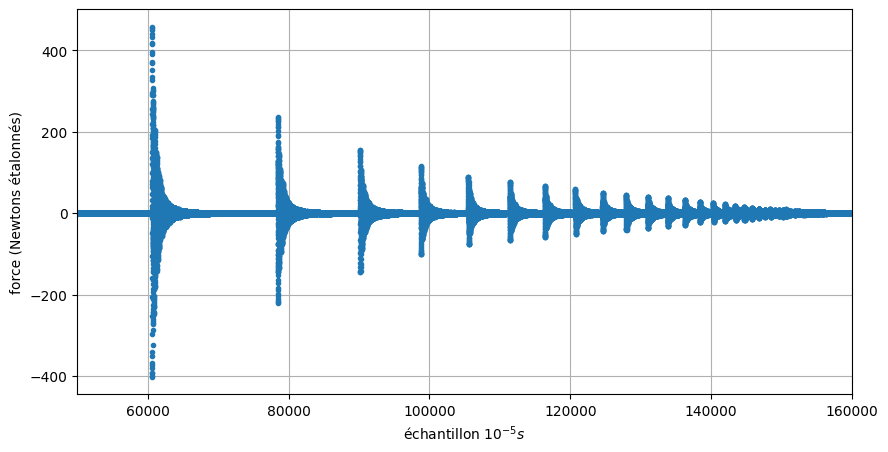

In [19]:
#Analyse de données pile AA16

filename = "AA16(1).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 15*1e4)
plt.grid()
plt.show()

filename = "AA16(2).csv"
data = pd.read_csv(filename, names=["Time","ChanSum"]) 

plt.figure(figsize=(10,5))

somme_etalon = AppliquerEtalonnageLineaire(data["ChanSum"].values)
plt.plot(somme_etalon,'.')
plt.ylabel("force (Newtons étalonnés)")
plt.xlabel("échantillon $10^{-5} s$")
plt.xlim(5*1e4, 16*1e4)
plt.grid()
plt.show()